# Project Report
Group 60: Daniyal, Ruth, Thomas, Paul

## Predicting the Presence of Heart Disease based on Data

### Introduction

   Heart disease commonly refers to reduced blood flow to the heart due to narrowed vessels. The most common heart disease is known as Coronary Artery Disease (CAD) where cholesterol deposits of plaque build up in the wall of the arteries [1]. The consequences of narrowed arteries include shortness of breath, chest pain, and eventually heart attacks. Thus the question we want to explore  is: **Can we use the heart disease data containing the different attributes of each patient to predict whether a future patient with certain attributes shows a diameter narrowing of <50% or >50%?**
   
   The heart disease dataset we will be using is a multivariate data set with 76 attributes. The chosen attributes will be the predictors for the classification of the last attribute (diagnosis of heart disease). The output variable of the classification will predict a value of 0 or 1 where Value 0: < 50% diameter narrowing (no heart disease) and Value 1: > 50% diameter narrowing (heart disease).

##### Excluded variables
Only 20 of these variables are potentially useful as predictors. The rest have been excluded for various reasons, as explained in the following table.
| Reason for exclusion | Variables excluded for this reason |
| -------------------- | ---------------------------------- |
| Irrelevant (for instance, dates) | id, ccf, ekgmo, ekgday, ekgyr, cmo, cday, cyr, name |
| Categorical variable without clear ordering | cp, restecg, proto, restwm, exerwm, thal |
| Part of the diagnosis, not a predictor | lmt, ladprox, laddist, diag, cxmain, ramus, om1, om2, rcaprox, rcadist |
| No documentation | htn, dummy, xhypo, restckm, exerckm, thalsev, thalpul, earlobe, lvx1, lvx2, lvx3, lvx4, lvf, cathef, junk |
| Too many NA values | painloc, painexer, relrest, pncaden, smoke, cigs, years, famhist, thaltime, slope, rldv5, rldv5e, ca, restef, exeref |
*Table 1.0*

##### Included Variables 
These are the variables we have chosen to include in our classification model.
| Chosen Variable | Description of Variable |
| --------------- | ----------------------- |
| age | The length of time the patient has lived (years) |
| sex | The patient's sex (0 = female, 1 = male) |
| chol | Cholesterol: the total amount of cholesterol in the patient's blood (mg/dL) |
| fbs | Fasting blood sugar above 120 mg/dL (0 = no, 1 = yes) |
| dm | History of diabetes (0 = no, 1 = yes) |
| dig | Digitalis used during exercise test (0 = no, 1 = yes) |
| prop | Beta blocker used during exercise test (0 = no, 1 = yes) |
| nitr | Nitrates used during exercise test (0 = no, 1 = yes) |
| pro | Calcium channel blocker used during exercise test (0 = no, 1 = yes) |
| diuretic | Diuretic used during exercise test (0 = no, 1 = yes) |
| thaldur | Duration of exercise test (min) |
| met | Metabolic equivalents: exercise workload achieved, rate of oxygen uptake compared to average basal metabolic rate (3.5mL O2/kg/min) |
| thalach | Maximum Heart Rate Achieved (bpm) |
| thalrest | Resting Heart Rate (bpm) |
| tpeakbps | Peak Exercise Blood Pressure, systolic (mmHg) |
| tpeakbpd | Peak Exercise Blood Pressure, diastolic (mmHg) |
| trestbps | Resting Blood Pressure, systolic (mmHg) |
| trestbpd | Resting Blood Pressure, diastolic (mmHg) |
| exang | Exercise induced angina (0 = no, 1 = yes) |
| oldpeak | ST segment depression induced by exercise relative to rest (mm) - refers to a specific segment of the patient's electrocardiogram (ECG) |
| disease | Target variable (no = no heart disease, yes = heart disease is present) |
*Table 1.1*

### Methods & Results

Our analysis makes use of the `repr`, `tidyverse`, `tidymodels`, and `GGally` packages in R. The data we are using is the Heart Disease dataset (specifically, `new.data`) from the UCI Machine Learning Repository.

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)
options(repr.matrix.max.cols = 100, repr.matrix.max.rows = 6)
options(repr.plot.width = 9, repr.plot.height = 7)
set.seed(9248)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### 1. Loading and Reading the Data 

First, to start the project we load the data from the original source on the web. We use the function `read_delim` to read the text file into a tibble, and separate out the last two columns (this is necessary because the first row of the text file has 7 columns, but the rest of the file has 8).

In [2]:
heart_raw <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/new.data",
                        col_names = FALSE, na = "-9") |>
    separate(X7, c("X7", "X8"), sep = " ", convert = TRUE)
heart_raw

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 18492 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
chr (2): X3, X7
dbl (5): X1, X2, X4, X5, X6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 2303 rows [12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 192, 204, 216, 228, 240, ...].”


X1,X2,X3,X4,X5,X6,X7,X8
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15943882,63,1,NA,NA,NA,NA
-27,1,145,1,233,NA,50,20
1,0,1,2,2,3,1981,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,1,NA,NA,NA,NA,-9,-9
NA,NA,NA,NA,NA,NA,-9,-9
NA,NA,Takacs,NA,NA,NA,NA,NA


#### 2. Wrangling and Cleaning the Data

The data comes as a very untidy text file, with each observation consisting of twelve rows, which we have rearranged so that there is only one row for each observation. The documentation also specifies 76 columns, but 90 are present in the file: there are 14 additional columns to the left of the `name` column, which we will ignore. According to the documentation, missing values are represented by `-9`, although other negative numbers present in the data also represent missing values.
Since it is immediately apparent that the data contains a lot of missing values, we have created a count of missing values for each column and rejected columns with more than 250 missing values. Removing such columns that regularly contain missing values will increase the number of complete observations that we are able to use to train and test our model.

In [3]:
row_count <- nrow(heart_raw) / 12
row_indexes <- tibble(id = rep(1:row_count, each = 12), Y = rep(1:12, times = row_count))
heart_indexed <- bind_cols(row_indexes, heart_raw)
heart_wide <- heart_indexed |>
    pivot_wider(names_from = Y, values_from = X1:X8, names_vary = "slowest") |>
    select(!c(id, X8_1, X4_12:X8_12)) |>
    type_convert() |>
    mutate(across(everything(), ~ifelse(.x < 0, NA, .x)))
colnames(heart_wide) <- c("id", "ccf", "age", "sex", "painloc", "painexer", "relrest", "pncaden", "cp", "trestbps",
                          "htn", "chol", "smoke", "cigs", "years", "fbs", "dm", "famhist", "restecg", "ekgmo",
                          "ekgday", "ekgyr", "dig", "prop", "nitr", "pro", "diuretic", "proto", "thaldur", "thaltime",
                          "met", "thalach", "thalrest", "tpeakbps", "tpeakbpd", "dummy", "trestbpd", "exang", "xhypo", "oldpeak",
                          "slope", "rldv5", "rldv5e", "ca", "restckm", "exerckm", "restef", "restwm", "exeref", "exerwm",
                          "thal", "thalsev", "thalpul", "earlobe", "cmo", "cday", "cyr", "num", "lmt", "ladprox",
                          "laddist", "diag", "cxmain", "ramus", "om1", "om2", "rcaprox", "rcadist", "lvx1", "lvx2",
                          "lvx3", "lvx4", "lvf", "cathef", "junk1", "junk2", "junk3", "junk4", "junk5", "junk6",
                          "junk7", "junk8", "junk9", "junk10", "junk11", "junk12", "junk13", "junk14", "junk15", "name")
heart_wide
heart_na <- heart_wide |>
    map_df(\(x) sum(is.na(x)))
heart_na


── Column specification ────────────────────────────────────────────────────────
cols(
  X3_1 = col_double(),
  X3_2 = col_double(),
  X3_3 = col_double(),
  X3_4 = col_double(),
  X3_5 = col_double(),
  X3_6 = col_double(),
  X3_7 = col_double(),
  X3_8 = col_double(),
  X3_9 = col_double(),
  X3_10 = col_double(),
  X3_11 = col_double(),
  X3_12 = col_character()
)



id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,num,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk1,junk2,junk3,junk4,junk5,junk6,junk7,junk8,junk9,junk10,junk11,junk12,junk13,junk14,junk15,name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,15943882,63,1,NA,NA,NA,NA,1,145,1,233,NA,50,20,1,0,1,2,2,3,1981,0,0,0,0,0,1,10.5,6,13,150,60,190,90,145,85,0,0,2.3,3,NA,NA,0,NA,NA,NA,NA,NA,NA,6,NA,NA,NA,2,16,1981,0,1,1,1,NA,1,NA,1,NA,1,1,1,1,1,1,1,NA,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,name
2,15964847,67,1,NA,NA,NA,NA,4,160,1,286,NA,40,40,0,0,1,2,3,5,1981,0,1,0,0,0,1,9.5,6,13,108,64,160,90,160,90,1,0,1.5,2,NA,NA,3,NA,NA,NA,NA,NA,NA,3,NA,NA,NA,2,5,1981,2,1,2,2,NA,2,NA,1,NA,1,1,1,1,1,1,1,NA,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,name
3,15952199,67,1,NA,NA,NA,NA,4,120,1,229,NA,20,35,0,0,1,2,2,19,1981,0,1,0,0,0,1,8.5,6,10,129,78,140,80,120,80,1,0,2.6,2,NA,NA,2,NA,NA,NA,NA,NA,NA,7,NA,NA,NA,2,20,1981,1,1,1,1,NA,1,NA,1,NA,2,2,1,1,1,7,3,NA,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,name
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1668,13203,57,1,1,NA,NA,NA,4,130,0,305.69,NA,NA,NA,0,0,NA,0,5,10,1989,0,0,0,0,0,100,10,4,5.0,105,67,210,120,130,80,0,0,4,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,NA,NA,2,NA,NA,NA,2,NA,NA,2,1,1,5,6,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Torok
1669,14205,47,1,1,NA,NA,NA,4,100,0,127.05,NA,NA,NA,0,0,NA,0,2,22,1989,0,0,0,0,0,100,10,NA,5.0,135,90,180,90,100,60,0,0,0,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,1,1,1,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Veszelsz
1670,15403,36,1,1,NA,NA,NA,3,120,0,221.76,NA,NA,NA,0,0,NA,0,3,2,1989,0,0,0,0,0,150,19,NA,7.5,147,76,180,85,120,80,0,0,0,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,1,1,1,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Takacs


id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,num,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk1,junk2,junk3,junk4,junk5,junk6,junk7,junk8,junk9,junk10,junk11,junk12,junk13,junk14,junk15,name
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,6,0,0,446,769,779,789,1,58,44,200,1140,890,899,92,0,871,2,148,153,148,180,178,181,177,222,208,55,654,150,151,153,162,167,158,159,157,159,174,403,1059,1059,1232,1541,1541,1479,1480,1537,1535,1142,1479,1523,1541,496,494,497,0,905,714,815,1192,748,1255,855,1249,734,832,260,261,262,261,39,1084,1420,54,1499,1504,1374,1541,1541,1450,1541,1541,1454,51,51,51,51,0


#### 3. Splitting the Data

We have kept 21 columns from the original dataset, removed rows containing missing values, and since we are trying to predict the *presence* of heart disease rather than the specific diagnosis number, we have replaced the `num` column (containing the diagnosis numbers) with a simple yes/no `disease` column. 25% of the rows have been split off to be used as testing data.

In [4]:
heart <- heart_wide |>
    select(age, sex, chol, fbs, dm, dig, prop, nitr, pro, diuretic, 
           thaldur, met, thalach, thalrest, tpeakbps, tpeakbpd, trestbps, trestbpd, exang, oldpeak, num) |>
    mutate(disease = as.factor(ifelse(num > 0, "yes", "no")), .keep = "unused") |>
    drop_na()
heart_split <- initial_split(heart, prop = 0.75, strata = disease)
heart_testing <- testing(heart_split)
heart_training <- training(heart_split)
heart_training

age,sex,chol,fbs,dm,dig,prop,nitr,pro,diuretic,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbps,trestbpd,exang,oldpeak,disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,233,1,0,0,0,0,0,0,10.5,13,150,60,190,90,145,85,0,2.3,no
37,1,250,0,0,0,1,0,0,0,13.0,17,187,84,195,68,130,78,0,3.5,no
41,0,204,0,0,0,0,0,0,0,7.0,9,172,71,160,74,130,86,0,1.4,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,319.55,0,0,0,0,0,0,0,19,8.5,150,82,210,120,130,80,0,0,yes
61,0,250.25,0,0,0,1,1,1,0,1,1.5,75,58,150,90,120,80,1,1,yes
57,1,305.69,0,0,0,0,0,0,0,10,5.0,105,67,210,120,130,80,0,4,yes


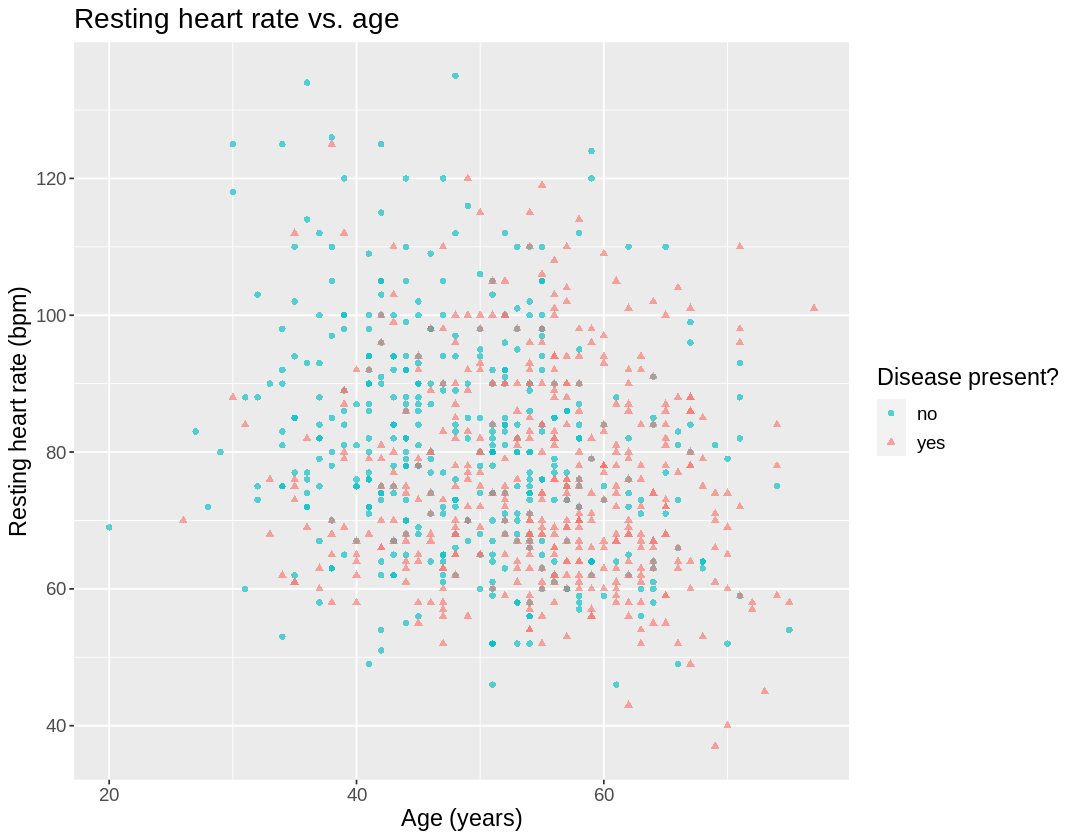

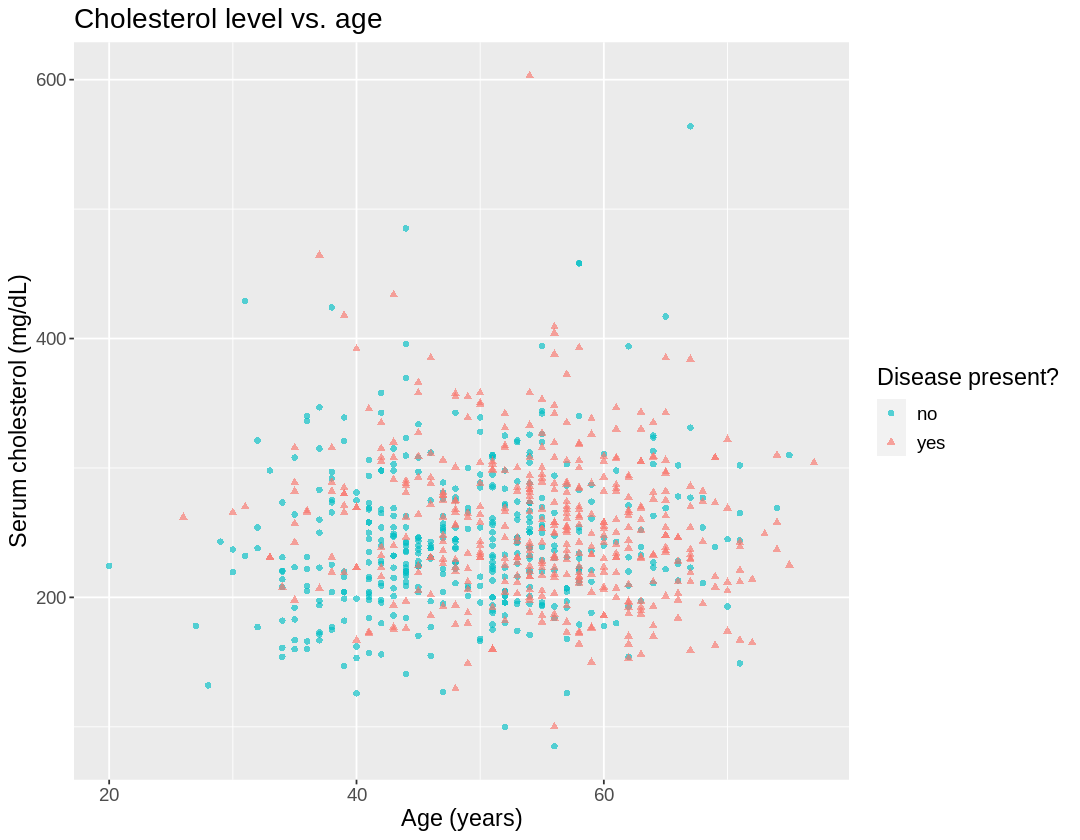

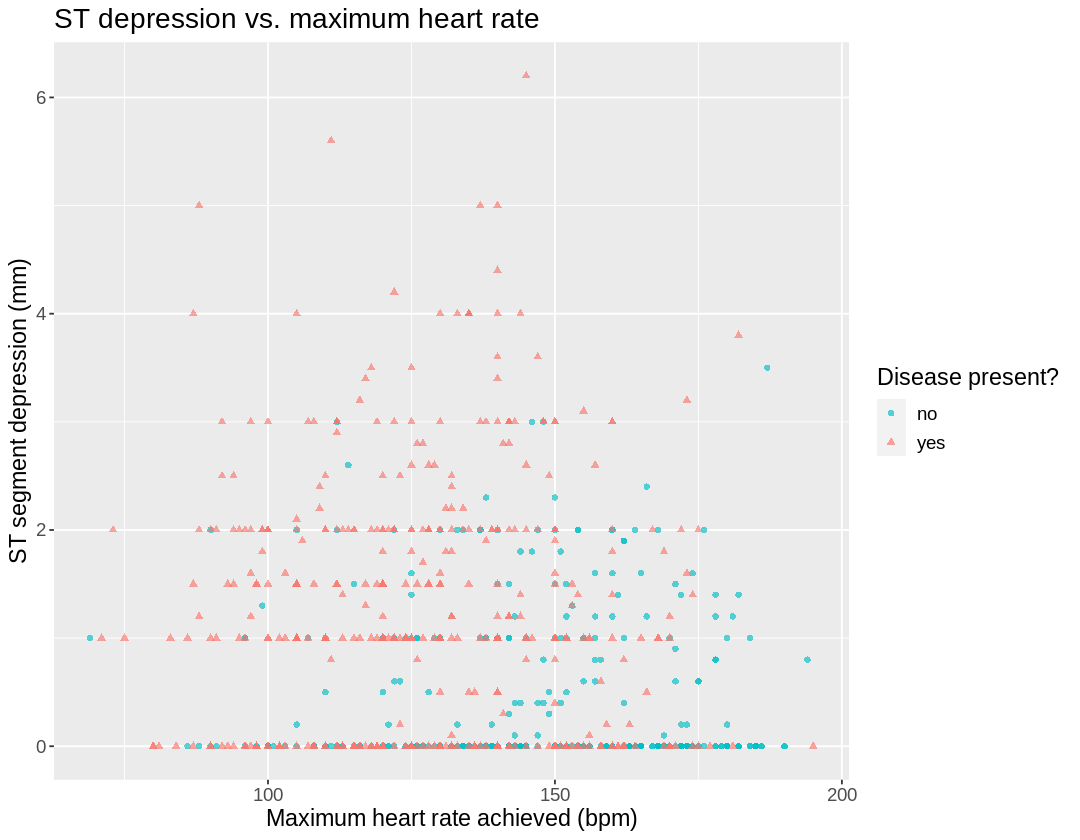

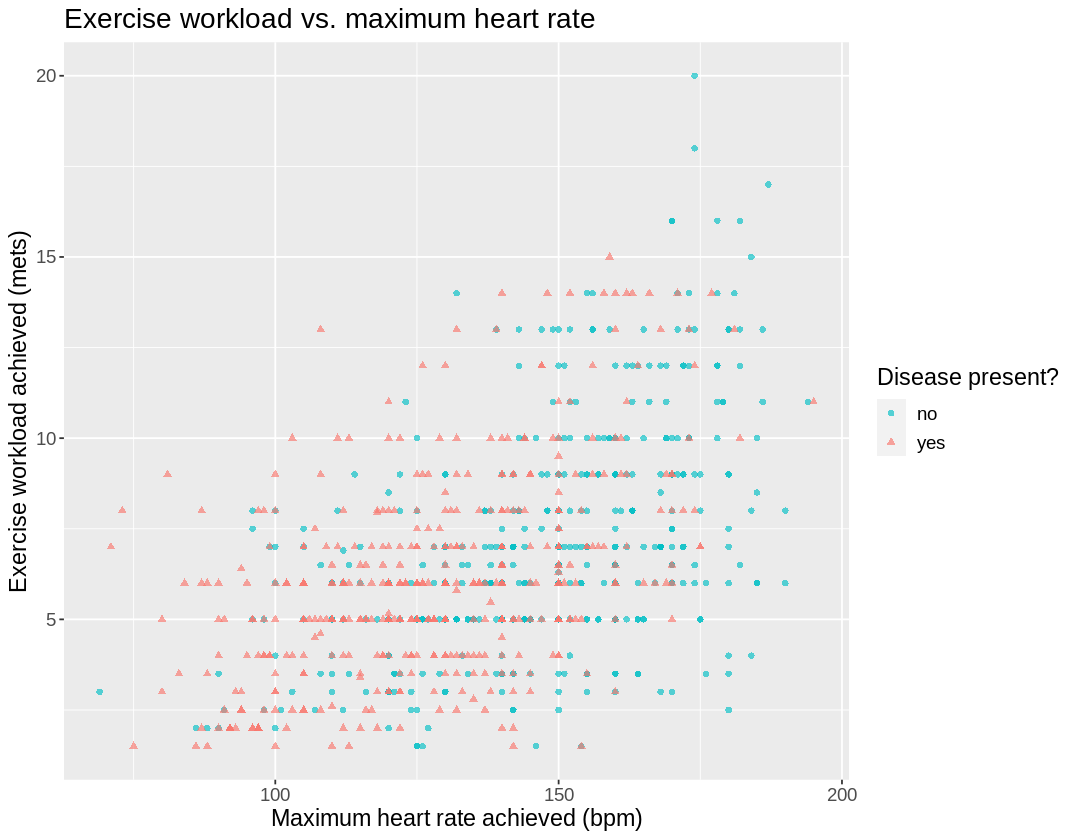

In [5]:
thalrest_vs_age <- heart_training |>
    ggplot(aes(x = age, y = thalrest, colour = disease, shape = disease)) +
        geom_point(alpha = 0.65) +
        scale_colour_hue(direction = -1) +
        labs(x = "Age (years)", y = "Resting heart rate (bpm)", colour = "Disease present?", shape = "Disease present?", title = "Resting heart rate vs. age") +
        theme(text = element_text(size = 14))
thalrest_vs_age
chol_vs_age <- heart_training |>
    ggplot(aes(x = age, y = chol, colour = disease, shape = disease)) +
        geom_point(alpha = 0.65) +
        scale_colour_hue(direction = -1) +
        labs(x = "Age (years)", y = "Serum cholesterol (mg/dL)", colour = "Disease present?", shape = "Disease present?", title = "Cholesterol level vs. age") +
        theme(text = element_text(size = 14))
chol_vs_age
oldpeak_vs_thalach <- heart_training |>
    ggplot(aes(x = thalach, y = oldpeak, colour = disease, shape = disease)) +
        geom_point(alpha = 0.65) +
        scale_colour_hue(direction = -1) +
        labs(x = "Maximum heart rate achieved (bpm)", y = "ST segment depression (mm)", colour = "Disease present?", shape = "Disease present?", title = "ST depression vs. maximum heart rate") +
        theme(text = element_text(size = 14))
oldpeak_vs_thalach
met_vs_thalach <- heart_training |>
    ggplot(aes(x = thalach, y = met, colour = disease, shape = disease)) +
        geom_point(alpha = 0.65) +
        scale_colour_hue(direction = -1) +
        labs(x = "Maximum heart rate achieved (bpm)", y = "Exercise workload achieved (mets)", colour = "Disease present?", shape = "Disease present?", title = "Exercise workload vs. maximum heart rate") +
        theme(text = element_text(size = 14))
met_vs_thalach

#### 4. Tuning the Classification with Cross-Validation

Now that we have split our data, we can build a model using our training data. We create a `recipe` to specify the predictors and output variable, and then use the `vfold_cv` function to split our training data for cross-validation. Next, we need to find the optimal k-value for our k-nearest neighbor model so we specify `neighbors = tune()` in our model spec then add that and our recipe into our `workflow`. Finally, we used the function `tune_grid` to estimate the accuracy for a wide range of K values. After plotting the accuracy against the number of neighbors, we searched for the k value that yielded the highest accuracy, and found that k = 31 was optimal for our model. The accuracy quickly deteriorates with lower k values, and the accuracy appears to slowly deteriorate with higher k values.

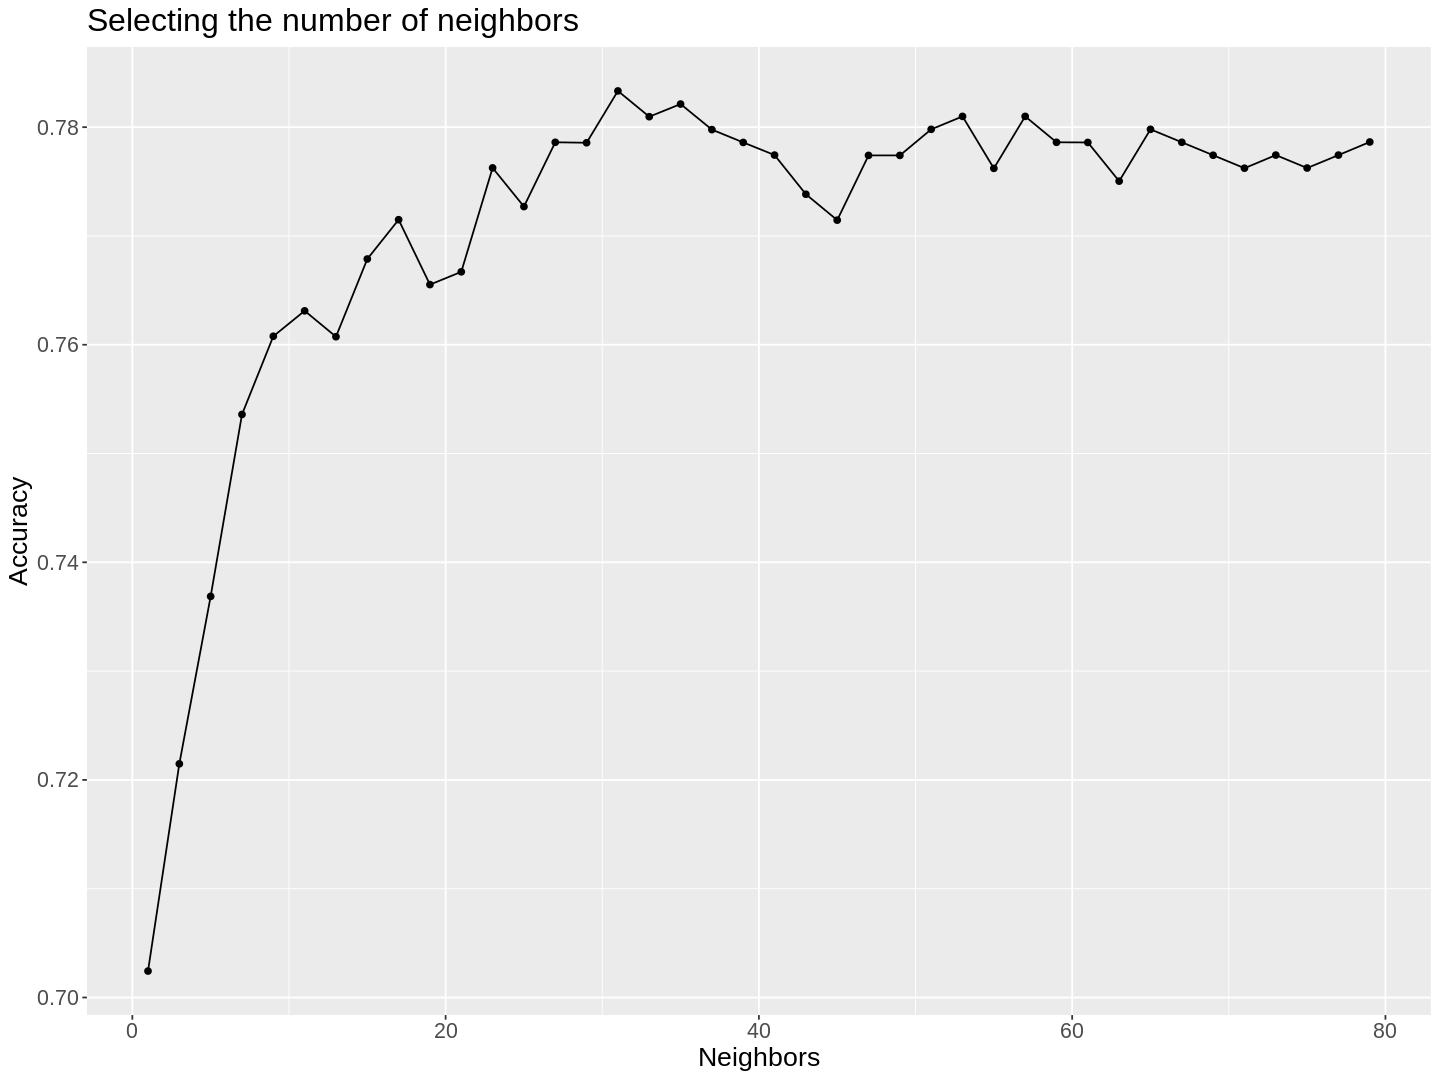

In [6]:
heart_recipe <- recipe(disease ~ ., data = heart_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors()) 

heart_vfold <- vfold_cv(heart_training, v = 10, strata = disease) 

heart_spec <- nearest_neighbor(weight_func="rectangular", neighbors=tune()) |>
                set_engine("kknn") |>
                set_mode("classification") 
gridvals <- tibble(neighbors = seq(1, 79, 2))
heart_results <- workflow() |>
                add_recipe(heart_recipe) |>
                add_model(heart_spec) |>
                tune_grid(resamples = heart_vfold, grid = gridvals) |>
                collect_metrics()

options(repr.plot.height = 9, repr.plot.width = 12)
neighbor_plot <- heart_results |>
    filter(.metric == "accuracy") |>
    ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Neighbors", y = "Accuracy", title = "Selecting the number of neighbors") +
        theme(text = element_text(size = 16))
neighbor_plot

Now that we have chosen 31 as our number of neighbors, we can build our model using the chosen k-value. As before, we create our model specification and combine it with the recipe into our workflow. Finally, we can `fit` the the training data `heart_training` into our workflow. 

In [7]:
heart_spec_bestk <- nearest_neighbor(weight_func = "rectangular", neighbors = 31) |>
                       set_engine("kknn") |>
                       set_mode("classification") 
heart_fit <- workflow () |>
                add_recipe(heart_recipe) |>
                add_model(heart_spec_bestk) |>
                fit(data=heart_training) 

#### 5. Using the Classification Model 

Now that we have created our K-nearest neighbours classifier model, we will use it to predict the diagnosis of a patient using our testing data `heart_testing`. We use the function `bind_cols` to add the column `.pred_class` which contains the predictions the classifier model made with the testing data. Once we have created the data frame `heart_predictions`, we can assess our model's accuracy using the function `metrics` and specify the truth and estimate arguments. Further, we wanted to visualize the statistics of how many were predicted incorrectly and correctly, so we used the function `conf_mat` to create a confusion matrix table. 

In [8]:
heart_predictions <- predict(heart_fit, heart_testing) |>
                        bind_cols(heart_testing)
heart_predictions

heart_metrics <- heart_predictions |>
                    metrics(truth=disease, estimate=.pred_class) |>
                    filter(.metric == "accuracy") 
heart_metrics

heart_conf_mat <- heart_predictions |>
                     conf_mat(truth=disease, estimate=.pred_class) 
heart_conf_mat 

.pred_class,age,sex,chol,fbs,dm,dig,prop,nitr,pro,diuretic,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbps,trestbpd,exang,oldpeak,disease
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
no,62,0,268,0,0,0,0,0,0,0,6,7,160,83,180,84,140,100,0,3.6,yes
no,57,0,354,0,0,0,0,0,0,0,9,10,163,84,165,80,120,80,1,0.6,no
yes,63,1,254,0,0,0,1,1,0,0,8,9,147,75,120,70,130,105,0,1.4,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
yes,51,1,239.47,0,0,0,0,0,0,0,11,5.0,140,95,200,100,145,85,1,2,yes
yes,51,1,300.30,1,0,0,1,1,1,0,8,3.5,120,90,162,90,140,80,0,0,yes
no,47,0,165.55,0,0,0,0,1,1,0,11,5.0,150,98,170,90,110,75,0,0,no


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7730496


          Truth
Prediction  no yes
       no  110  36
       yes  28 108

### Discussion

#### Summary
  We tested our model for predicting heart disease using a testing set of 282 patients. We found that our model accurately predicted heart disease around 77 percent of the time, falsely predicted a positive result around 10 percent of the time, and falsely predicted a negative result around 13 percent of the time. 
#### Expectations of Model
   Patients in our testing data had heart disease around 51 percent of the time, and thus a model that predicted yes for every patient would predict correctly 51 percent of the time. Given that our model was able to learn from training data, we predicted that our model would do significantly better than this basic prediction, but since patients tend to vary from person to person, and much of this variation is not given to our model, we did not expect a result of over 90 percent accuracy. Thus, an accuracy of 77 percent was what we expected. Because of the health risks associated with heart disease, even occasional failures (especially false negatives) could have potentially life-threatening consequences, so our model should not be trusted when making diagnoses. Since our current model fails almost a quarter of the time, it is quite likely it is not given enough important information about the patient to make very accurate predictions, so any KNN model that uses only the 20 predicting variables that we used will likely not be accurate enough to be used in a real-life setting such as hospitals or clinics. 
#### Relevant Literature
   In contrast, a 2020 paper analyzing the accuracy of different classifiers for heart disease found a 99.7073% accuracy when using a KNN(K=1) algorithm. The algorithm took into account 14 different variables and classified 1025 patients. Furthermore, it should be noted that the variables used included age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST segment depression, the slope of the peak exercise ST segment, number of major vessels coloured by fluoroscopy and defect along with the class attribute[2]. Many of these variables are the same as some of the ones we used, but they also include some relating to medical imaging data such as electrocardiographs and fluoroscopy which were too often missing in our dataset for us to consider them. Considering we had excessive missing values in our dataset and still managed to score 77%, we can say our classifier works theoretically but is far from being applied to real-world applications.
#### Impact of our Model and Future Questions
   Currently, we can see that our heart disease classification model with the eleven predictor variables has not shown a promising accuracy or significant impact on future healthcare systems. Further, in our Relevant Literature Discussion, we displayed that even accurate predictor variables such as medical imaging reports are still impossible to achieve a model accuracy of 100%. If a reliable model were to be created, patients could easily self-diagnose themselves at home. The need for doctors would diminish if all of our diagnoses could be made based on classification models with 100% accuracy. However, one can argue that a classification model does not have to be 100% accurate. For example, doctors who perform medical tests, look at medical imaging, and account for the patient's symptoms don't always provide a 100% accurate diagnosis either. However, in terms of classification models, we noticed that the predictor variables are very limited and restricted. This demonstrates a clear distinction between Doctors who are continually learning and adapting their diagnosis abilities through different cases. The creativity and adaptability limit classification models even with nearly 100% accuracy and thus shows that the impact of medical classification models such as ours may not have a significant impact in hospitals yet. Thus, future questions we can ask are: 
 - Can classification model accuracies surpass the adaptability and creativity of human diagnoses?
  - If classification models were to be implemented in hospitals, what would be the impact if a disagreement were to emerge between the Doctor's diagnosis and the model's classification?

### Legend

*Table 1.0* Table with excluded variables and reasons for exclusion. 

*Table 1.1* Table with included variables and descriptions. 

### References


[1]“About Heart Disease.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 12 July 2022, https://www.cdc.gov/heartdisease/about.htm#:~:text=The%20term%20%E2%80%9Cheart%20disease%E2%80%9D%20refers,can%20cause%20a%20heart%20attack. 

[2] Almustafa, K.M. Prediction of heart disease and classifiers’ sensitivity analysis. BMC Bioinformatics 21, 278 (2020). https://doi.org/10.1186/s12859-020-03626-y
#### Data attribution
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.